In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
import statsmodels.distributions
import seaborn as sns
from statsmodels.stats.power import TTestIndPower
from numpy.random import randint

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hw_abt_2_byuser.csv to hw_abt_2_byuser (1).csv
Saving hw_abt_2_bybucket.csv to hw_abt_2_bybucket (1).csv


In [ ]:
user = pd.read_csv('hw_abt_2_byuser.csv', sep = '\t')
bucket = pd.read_csv('hw_abt_2_bybucket.csv', sep = '\t')          

In [ ]:
user.head()  

,Unnamed: 0,group_id,metric_value,users,visits,churn_users,churn_visits,group
0,0,8,6630.000,0,0,0,8,A
1,1,13,6933.976,0,0,1,6,B
2,2,10,8261.976,1,10,1,8,B
3,3,4,5522.000,1,9,1,7,A
4,4,16,5075.976,1,6,0,8,B


In [ ]:
bucket.head()

,group_id,metric_value,users,visits,churn_users,churn_visits
0,1,1875345.0,155,1419,151,2207
1,2,1662237.0,138,1320,127,1853
2,3,1784372.0,128,1281,159,2032
3,4,1876826.0,163,1644,168,2172
4,5,1913180.0,156,1675,174,2273


In [ ]:
user = user.drop('Unnamed: 0', axis =1)

In [ ]:
user.isna().sum()

group_id        0
metric_value    0
users           0
visits          0
churn_users     0
churn_visits    0
group           0
dtype: int64

Убираем неоднозначность данных

In [ ]:
table = user.loc[(user['users'] > 0) & (user['visits'] == 0)]
table[table['group_id'] > 8]

,group_id,metric_value,users,visits,churn_users,churn_visits,group
27,15,5181.976,1,0,0,9,B
89,16,7727.976,1,0,1,5,B
178,10,5499.976,1,0,1,7,B
225,13,8428.976,1,0,1,4,B
297,14,7351.976,1,0,0,7,B
...,...,...,...,...,...,...,...
4784,12,9660.976,1,0,1,7,B
4842,10,7119.976,1,0,1,9,B
4881,13,5083.976,1,0,1,4,B
4887,13,5168.976,1,0,1,5,B


In [ ]:
mean_a = user[user['group_id'] <= 8]['visits'].mean()
mean_b = user[user['group_id'] > 8]['visits'].mean()
print(mean_a, mean_b)

4.839657282741738 4.553942722636328


In [ ]:
user.loc[(user['visits'] == 0) & (user['users'] !=0) & (user['group_id'] <= 8), 'visits'] = np.round(mean_a)
user.loc[(user['visits'] == 0) & (user['users'] !=0) & (user['group_id'] > 8), 'visits'] = randint(4, 6)


In [ ]:
table = user.loc[(user['users'] != 0) & (user['visits'] == 0)]
table

,group_id,metric_value,users,visits,churn_users,churn_visits,group


In [ ]:
bucket = user.groupby('group_id').sum()
bucket.reset_index(level=0, inplace=True)
bucket

,group_id,metric_value,users,visits,churn_users,churn_visits
0,1,1875345.000,155,1504.0,151,2207
1,2,1662237.000,138,1385.0,127,1853
2,3,1784372.000,128,1316.0,159,2032
3,4,1876826.000,163,1694.0,168,2172
4,5,1913180.000,156,1770.0,174,2273
5,6,1733079.000,144,1564.0,141,2009
6,7,1864555.000,151,1551.0,161,2139
7,8,2029143.000,162,1603.0,153,2299
8,9,2047289.536,143,1440.0,242,2191
9,10,2228154.648,179,1867.0,265,2518


In [ ]:
user.describe()

,group_id,metric_value,users,visits,churn_users,churn_visits
count,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,8.5982,6234.010565,0.491800,4.888600,0.647600,6.955400
std,4.5846,1724.183324,0.499983,8.410561,0.477766,1.937153
min,1.0000,1343.000000,0.000000,0.000000,0.000000,0.000000
25%,5.0000,4978.000000,0.000000,0.000000,0.000000,6.000000
50%,9.0000,6242.488000,0.000000,0.000000,1.000000,7.000000
75%,13.0000,7543.976000,1.000000,6.000000,1.000000,9.000000
max,16.0000,10862.000000,1.000000,70.000000,1.000000,9.000000


In [ ]:
A_user = user[user['group_id'] <= 8]
B_user = user[user['group_id'] >= 9]
A_bucket = bucket[bucket['group_id'] <= 8]
B_bucket = bucket[bucket['group_id'] >= 9]

In [ ]:
A_user.describe()

,group_id,metric_value,users,visits,churn_users,churn_visits
count,2451.000000,2451.000000,2451.000000,2451.000000,2451.000000,2451.000000
mean,4.552836,6013.356589,0.488372,4.839657,0.503468,6.929417
std,2.304557,1706.147953,0.499967,8.789929,0.500090,1.944200
min,1.000000,1343.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4744.000000,0.000000,0.000000,0.000000,6.000000
50%,5.000000,6035.000000,0.000000,0.000000,1.000000,7.000000
75%,7.000000,7303.500000,1.000000,6.000000,1.000000,9.000000
max,8.000000,10862.000000,1.000000,66.000000,1.000000,9.000000


In [ ]:
B_user.describe()

,group_id,metric_value,users,visits,churn_users,churn_visits
count,2549.000000,2549.000000,2549.000000,2549.000000,2549.000000,2549.000000
mean,12.488035,6446.181179,0.495096,4.729698,0.786191,6.980384
std,2.291621,1715.107559,0.500074,8.089976,0.410074,1.930404
min,9.000000,1616.976000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,5167.976000,0.000000,0.000000,1.000000,6.000000
50%,12.000000,6454.976000,0.000000,0.000000,1.000000,7.000000
75%,14.000000,7765.976000,1.000000,6.000000,1.000000,9.000000
max,16.000000,10784.976000,1.000000,70.000000,1.000000,9.000000


# Исследуем различные метрики

## Гистограммы распределения metric_value

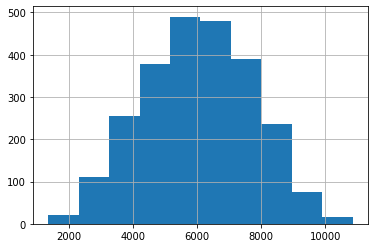

In [ ]:
A_user['metric_value'].hist()

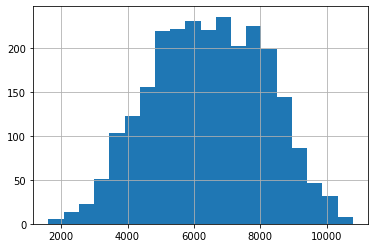

In [ ]:
B_user['metric_value'].hist(bins = 20)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


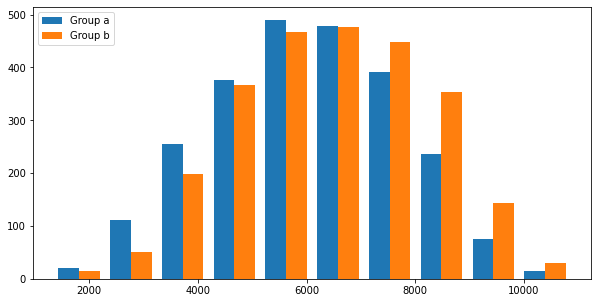

In [ ]:
plt.figure(figsize=(10,5))
plt.hist([A_user['metric_value'], B_user['metric_value']], label=['Group a', 'Group b'])
plt.legend(loc='upper left')
plt.show()

Эмпирические функции распределения metric_value

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


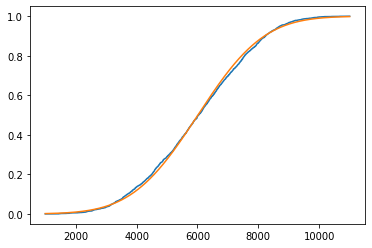

In [ ]:
x_axis = np.arange(1000,11000 , 0.1)
sns_plot = sns.lineplot(x_axis, statsmodels.distributions.empirical_distribution.ECDF(A_user['metric_value'])(x_axis))
sns_plot2 = sns.lineplot(x_axis, scs.norm.cdf(x_axis, loc = 6013, scale = 1706))
fig = sns_plot.get_figure()
fig = sns_plot2.get_figure()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


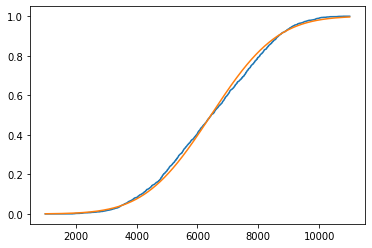

In [ ]:
x_axis = np.arange(1000,11000 , 0.1)
sns_plot = sns.lineplot(x_axis, statsmodels.distributions.empirical_distribution.ECDF(B_user['metric_value'])(x_axis))
sns_plot2 = sns.lineplot(x_axis, scs.norm.cdf(x_axis, loc = 6446, scale = 1706))
fig = sns_plot.get_figure()
fig = sns_plot2.get_figure()

 Оба графика имеют немного похожий на нормальное распределение вид, но верхняя граница сильно выпрямлена(особенно у B)

# Проведем тесты

## Для А

In [ ]:
alpha = 0.05

st_a = scs.shapiro(A_user['metric_value'])
print('Distribution is {}normal\n'.format( {True:'not ', False:''}[st_a[1] < alpha]))
print(st_a)

Distribution is not normal

(0.9951456189155579, 3.546447828739474e-07)


In [ ]:
ks_a = scs.kstest(A_user['metric_value'], 'norm')
print('Distribution is {}normal\n'.format( {True:'not ', False:''}[ks_a[1] < alpha]))
print(ks_a)

Distribution is not normal

KstestResult(statistic=1.0, pvalue=0.0)


In [ ]:
X_exp1_a = scs.norm.rvs(size = len(A_user['metric_value']) * 200, loc = 6013)
X_exp_a = np.histogram(X_exp1_a)[0]/200
chast_a = np.histogram(A_user['metric_value'])[0]
ch_a = scs.chisquare(chast_a, X_exp_a)
print('Distribution is {}normal\n'.format( {True:'not ', False:''}[ch_a[1] < alpha]))
print(ch_a)

Distribution is not normal

Power_divergenceResult(statistic=4406.939942255065, pvalue=0.0)


# Для B

In [ ]:
st_b = scs.shapiro(B_user['metric_value'])
print('Distribution is {}normal\n'.format( {True:'not ', False:''}[st_b[1] < alpha]))
print(st_b)

Distribution is not normal

(0.9923585057258606, 2.4686641619808825e-10)


In [ ]:
ks_b = scs.kstest(A_user['metric_value'], 'norm')
print('Distribution is {}normal\n'.format( {True:'not ', False:''}[ks_b[1] < alpha]))
print(ks_b)

Distribution is not normal

KstestResult(statistic=1.0, pvalue=0.0)


In [ ]:
X_exp1_b = scs.norm.rvs(size = len(B_user['metric_value']) * 200, loc = 6013)
X_exp_b = np.histogram(X_exp1_b)[0]/200
chast_b = np.histogram(B_user['metric_value'])[0]
ch_b = scs.chisquare(chast_b, X_exp_b)
print('Distribution is {}normal\n'.format( {True:'not ', False:''}[ch_b[1] < alpha]))
print(ch_b)

Distribution is not normal

Power_divergenceResult(statistic=100939.78227215522, pvalue=0.0)


## Все тесты показывают, что распределение ненормальное => нам необходимо использовать тесты, которые не требуют нормальности распределения

In [ ]:
def levene_test(df1, df2, p_value = alpha):
  st = scs.levene(df1, df2)
  print('Variances of distributions are {}equal\n'.format( {True:'not ', False:''}[st[1] < p_value]))
  return(st)
levene_test(A_user['metric_value'], B_user['metric_value'], alpha)

Variances of distributions are equal



LeveneResult(statistic=0.8558572644772319, pvalue=0.35494527384691044)

# Дисперсии равны

# Оценка матожиданий



In [ ]:
mn = scs.mannwhitneyu(A_user['metric_value'], B_user['metric_value'])
print('Diffs is {}significant\n'.format( {True:'not ', False:''}[mn[1] < alpha]))
print(mn)

Diffs is not significant

MannwhitneyuResult(statistic=2693632.0, pvalue=1.723988060046619e-17)


Матожидания равны

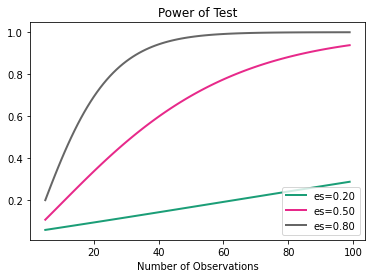

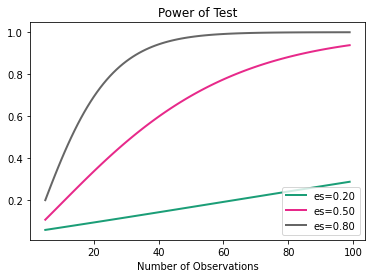

In [ ]:
analysis = TTestIndPower()
analysis.plot_power(nobs=np.arange(5, 100),
effect_size=np.array([0.2, 0.5, 0.8])) 

In [ ]:
effect = 0.08
alpha = 0.05
power = 0.8
# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power,
nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.3f' % result)

Sample Size: 2453.730


# Диаграмма размаха

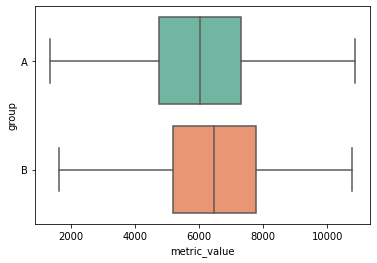

In [ ]:
sns.boxplot(x = 'metric_value', y = 'group', data = user, palette = 'Set2')

# Исследуем visits

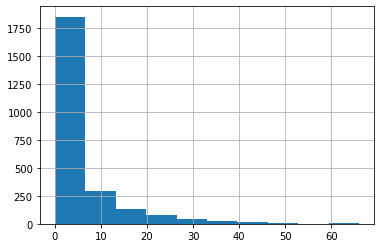

In [ ]:
A_user['visits'].hist()

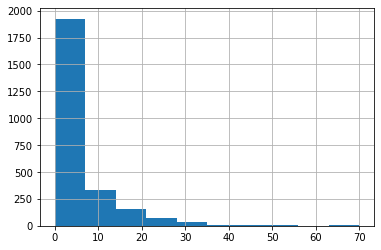

In [ ]:
B_user['visits'].hist()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


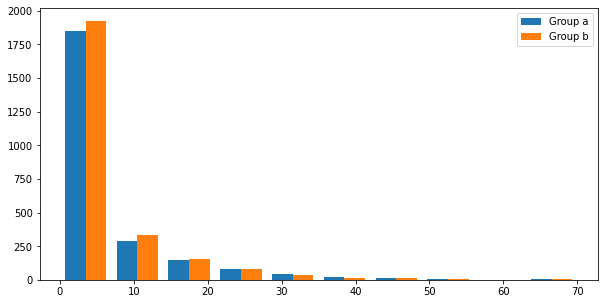

In [ ]:
plt.figure(figsize=(10,5))
plt.hist([A_user['visits'], B_user['visits']], label=['Group a', 'Group b'])
plt.legend(loc='upper right')
plt.show()

## Мы видим, что количество юсеров с маленьким количеством целевых действий увеличилось, а с большим- уменьшилось

In [ ]:
print(A_user['visits'].mean(), B_user['visits'].mean())

5.053855569155447 4.773636720282464


Распределения не нормальные

## Применим тесты для ненормальных распределений

In [ ]:
  st = scs.levene(A_user['visits'], B_user['visits'])
  print('Variances of distributions are {}equal\n'.format( {True:'not ', False:''}[st[1] < p_value]))

Variances of distributions are equal



In [ ]:
mn = scs.mannwhitneyu(A_user['visits'], B_user['visits'])
print('Diffs is {}significant\n'.format( {True:'not ', False:''}[mn[1] < alpha]))
print(mn)

Diffs is significant

MannwhitneyuResult(statistic=3122252.5, pvalue=0.48702495757862463)


## Различие между метриками существенное

# Диаграмма размаха

In [ ]:
sns.boxplot(y = 'visits', x = 'group', data = user, palette = 'Set2', orient = 'v')

# Исследуем Churn Visits

In [ ]:
A_user['churn_visits'].hist()

In [ ]:
B_user['churn_visits'].hist()

In [ ]:
plt.figure(figsize=(10,5))
plt.hist([A_user['churn_visits'], B_user['churn_visits']], label=['Group a', 'Group b'])
plt.legend(loc='upper right')
plt.show()

## Мы видим, что количество юсеров с маленьким количеством отрицательных целевых действий уменьшилось, а с большим- увеличилось

Распределения ненормальные

In [ ]:
print(A_user['churn_visits'].mean(), B_user['churn_visits'].mean())

## Применим тесты для ненормальных распределений

In [ ]:
st = scs.levene(A_user['churn_visits'], B_user['churn_visits'])
print('Variances of distributions are {}equal\n'.format( {True:'not ', False:''}[st[1] < p_value]))

In [ ]:
mn = scs.mannwhitneyu(A_user['churn_visits'], B_user['churn_visits'])
print('Diffs is {}significant\n'.format( {True:'not ', False:''}[mn[1] < alpha]))
print(mn)

Различия существенны

Диаграмма размаха

In [ ]:
sns.boxplot(y = 'churn_visits', x = 'group', data = user, palette = 'Set2', orient = 'v')

In [ ]:
!pip install bootstrapped

# Теперь используем бутстрэп, чтобы мы могли применять тесты для нормальных распределений

In [ ]:
from bootstrapped import bootstrap as bs
from bootstrapped import compare_functions as bs_compare
from bootstrapped import stats_functions as bs_stats

ModuleNotFoundError: ignored

## Metric Value

In [ ]:
A_user_norm = bs.bootstrap(A_user['metric_value'].values,bs_stats.mean, return_distribution=True, num_iterations = len(A_user))
B_user_norm = bs.bootstrap(B_user['metric_value'].values,bs_stats.mean, return_distribution=True, num_iterations = len(B_user))

NameError: ignored

In [ ]:
print('Mean for A: {}'.format(A_user_norm.mean()))
print('Std for A: {}'.format(A_user_norm.std()))
print('Mean for B: {}'.format(B_user_norm.mean()))
print('Std for B: {}'.format(B_user_norm.std()))

In [ ]:
len(A_user_norm)

Новые гистограммы распределений и эмперические функции

In [ ]:
plt.hist(A_user_norm, bins = 15)

In [ ]:
plt.hist(B_user_norm, bins = 15)

In [ ]:
x_axis = np.arange(5500,6500 , 0.1)
sns_plot = sns.lineplot(x_axis, statsmodels.distributions.empirical_distribution.ECDF(A_user_norm)(x_axis))
sns_plot2 = sns.lineplot(x_axis, scs.norm.cdf(x_axis, loc = 6013, scale = 34))
fig = sns_plot.get_figure()
fig = sns_plot2.get_figure()

In [ ]:
x_axis = np.arange(5900,6950 , 0.1)
sns_plot = sns.lineplot(x_axis, statsmodels.distributions.empirical_distribution.ECDF(B_user_norm)(x_axis))
sns_plot2 = sns.lineplot(x_axis, scs.norm.cdf(x_axis, loc = 6445, scale = 34))
fig = sns_plot.get_figure()
fig = sns_plot2.get_figure()

Исследуем на нормальность

In [ ]:
alpha = 0.05

st_a = scs.shapiro(A_user_norm)
print('Distribution is {}normal\n'.format( {True:'not ', False:''}[st_a[1] < alpha]))
print(st_a)

In [ ]:
st_b = scs.shapiro(B_user_norm)
print('Distribution is {}normal\n'.format( {True:'not ', False:''}[st_b[1] < alpha]))
print(st_b)

Сравним дисперсии

In [ ]:
p_value = scs.f_oneway(A_user_norm, B_user_norm)[1]
print('{} the H0: Var(X1) == Var(X2)\n'.format({True:'Reject', False:'Confirm'}[p_value > alpha]))

In [ ]:
st = scs.bartlett(A_user_norm, B_user_norm)
print('Variances of distributions are {}equal\n'.format( {True:'not ',False:''}[st[1] < p_value]))

In [ ]:
st = scs.ttest_ind(A_user_norm, B_user_norm)
print('Diffs is {}significant\n'.format( {True:'not ',False:''}[st[1] < alpha]))

## Visits

In [ ]:
A_user_norm_visit = bs.bootstrap(A_user['visits'].values,bs_stats.mean, return_distribution=True, num_iterations = len(A_user))
B_user_norm_visit = bs.bootstrap(B_user['visits'].values,bs_stats.mean, return_distribution=True, num_iterations = len(B_user))

In [ ]:
print('Mean for A: {}'.format(A_user_norm_visit.mean()))
print('Std for A: {}'.format(A_user_norm_visit.std()))
print('Mean for B: {}'.format(B_user_norm_visit.mean()))
print('Std for B: {}'.format(B_user_norm_visit.std()))

In [ ]:
plt.hist(A_user_norm_visit)

In [ ]:
plt.hist(B_user_norm_visit)

In [ ]:
plt.figure(figsize=(10,5))
plt.hist([A_user_norm_visit, B_user_norm_visit], label=['Group a', 'Group b'])
plt.legend(loc='upper left')
plt.show()

In [ ]:
st_a = scs.shapiro(A_user_norm_visit)
print('Distribution is {}normal\n'.format( {True:'not ', False:''}[st_a[1] < alpha]))
print(st_a)

In [ ]:
st_b = scs.shapiro(B_user_norm_visit)
print('Distribution is {}normal\n'.format( {True:'not ', False:''}[st_b[1] < alpha]))
print(st_b)

# Churn visits

In [ ]:
A_user_norm_churn_visit = bs.bootstrap(A_user['churn_visits'].values,bs_stats.mean, return_distribution=True, num_iterations = len(A_user))
B_user_norm_churn_visit = bs.bootstrap(B_user['churn_visits'].values,bs_stats.mean, return_distribution=True, num_iterations = len(B_user))

In [ ]:
print('Mean for A: {}'.format(A_user_norm_churn_visit.mean()))
print('Std for A: {}'.format(A_user_norm_churn_visit.std()))
print('Mean for B: {}'.format(B_user_norm_churn_visit.mean()))
print('Std for B: {}'.format(B_user_norm_churn_visit.std()))

Mean for A: 6.928608561339587
Std for A: 0.03828412922687957
Mean for B: 6.980824332683176
Std for B: 0.03823210377351361


(array([  8.,  31., 127., 357., 631., 616., 438., 186.,  45.,  12.]),
 array([6.79273766, 6.81925745, 6.84577723, 6.87229702, 6.89881681,
        6.9253366 , 6.95185639, 6.97837617, 7.00489596, 7.03141575,
        7.05793554]),
 <a list of 10 Patch objects>)

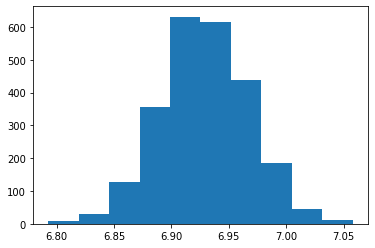

In [ ]:
plt.hist(A_user_norm_churn_visit)

(array([ 13.,  51., 190., 450., 681., 642., 374., 116.,  24.,   8.]),
 array([6.85170655, 6.87846214, 6.90521773, 6.93197332, 6.95872891,
        6.9854845 , 7.01224009, 7.03899568, 7.06575128, 7.09250687,
        7.11926246]),
 <a list of 10 Patch objects>)

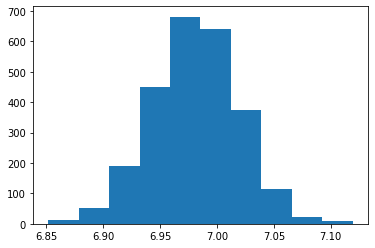

In [ ]:
plt.hist(B_user_norm_churn_visit)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


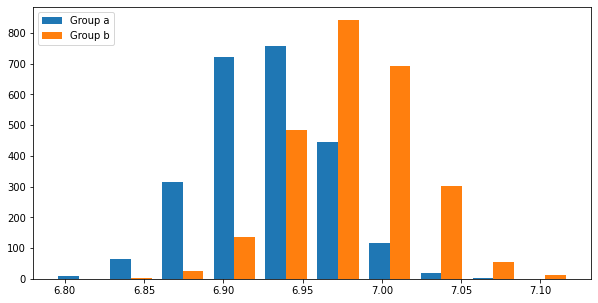

In [ ]:
plt.figure(figsize=(10,5))
plt.hist([A_user_norm_churn_visit, B_user_norm_churn_visit], label=['Group a', 'Group b'])
plt.legend(loc='upper left')
plt.show()

In [ ]:
st_a = scs.shapiro(A_user_norm_churn_visit)
print('Distribution is {}normal\n'.format( {True:'not ', False:''}[st_a[1] < alpha]))
print(st_a)

Distribution is normal

(0.9994896650314331, 0.7919822335243225)


In [ ]:
st_b = scs.shapiro(B_user_norm_churn_visit)
print('Distribution is {}normal\n'.format( {True:'not ', False:''}[st_b[1] < alpha]))
print(st_b)

Distribution is normal

(0.9994062781333923, 0.6311600804328918)


In [ ]:
st = scs.ttest_ind(A_user_norm_visit, B_user_norm_visit)
print(st)
print('Diffs is {}significant\n'.format( {True:'not ',False:''}[st[1] < alpha]))

Ttest_indResult(statistic=59.048185652938365, pvalue=0.0)
Diffs is not significant



## Сравним дисперсии

In [ ]:
p_value = scs.f_oneway(A_user_norm_visit, B_user_norm_visit)[1]
print('{} the H0: Var(X1) == Var(X2)\n'.format({True:'Reject', False:'Confirm'}[p_value > alpha]))

Confirm the H0: Var(X1) == Var(X2)



In [ ]:
st = scs.bartlett(A_user_norm_visit, B_user_norm_visit)
print('Variances of distributions are {}equal\n'.format( {True:'not ',False:''}[st[1] < p_value]))

Variances of distributions are equal



In [ ]:
st = scs.ttest_ind(A_user_norm_churn_visit, B_user_norm_churn_visit)
print(st)
print('Diffs is {}significant\n'.format( {True:'not ',False:''}[st[1] < alpha]))

Ttest_indResult(statistic=-48.2356899405339, pvalue=0.0)
Diffs is not significant



# Выводы

1) В обоих случаях(без бутстрэпа и с) велечина Metric Value изменилась несущественно

2) Количество целевых сессий уменьшилось значимо для обычной выборки, для бутстрапированной выборки - нет

3) Количество нецелевых сессий увеличилось увеличилось значимо для обычной выборки, для бутстрапированной - нет

=> Нововведение оказалось лишним